## Super Store Exploratory Data Analysis
### Introduction
Super Store is a reail store in the United States. They sell various products such as office supplies, furniture and electronics. This dataset comprises sales data, location and types of product for orders.

### Task
We have to identify the business opportunity and issues for Super Store to assist with the market growth

### Data Questions to ask
1) What is the best and worst selling category ?<br>
2) What is the best and worst selling sub category ?<br>
3) What Region an City has the Highest Sales value ?<br>
4) Which Segment is the most profitale ?<br> 
5) What is the most used shipping mode ?

### Setting up
import the follow libraries:
- Pandas: Data manipulation
- Matplotlib and Seaborn: Data Visualisation

In [201]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

## Data Exploration
Getting a brief idea of what the data looks like


In [202]:
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [203]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Data Cleaning
check if there are missing values and duplicated data in set

In [205]:
df.shape

(9994, 21)

In [206]:
#checking for missing values in the data
df.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [207]:
#checking for duplicates in the data
df.duplicated().sum()

0

### Duplicates
From the preview of the data set, we can see that there are orders that are completed by the same client on the same day, although they are for purchasing different products, they should be considered as the same entry. Hence, we would need to combine these rows.<br>
These datas has the same order data and the customer id, so we would combine these rows and create a new data but with only the column that are useful for analysis. i.e. sales, quantity and profit

In [208]:
df2 = df[["Customer ID","Customer Name","Order Date","Sales","Quantity","Profit"]]
df2.head()
df3 = df2.groupby(["Customer ID","Order Date"]).agg({"Sales":"sum","Quantity":"sum","Profit":"sum"})
df3.head()

# We are grouping the data set by Customer ID and Order Date
# We added the quantity, sales and profit for the same order and take average of the discount 


Sales  Quantity    Profit
Customer ID Order Date                              
AA-10315    10/4/2015     26.960         2    7.0096
            3/3/2016    4406.072        14 -747.1021
            3/31/2014    726.548         4  267.4224
            6/29/2017    374.480         5   96.5050
            9/15/2014     29.500         5   13.2826

## Descriptive Statistics
Retrieve a descriptive statistics summary

In [209]:
df.describe(include = "all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


### Conclusions
From the above information we can observe the follow<br>
1) The best selling region City and Region are New york and the West coast respectively.<br>
2) The average and median discount for orders are 16% and 20% respectively.<br>
3) The average and median profit per order is 28.7 and 8.7 respectively.<br>
4) Maximum loss and profit for orders are -6600 and 8400 respectively.<br>
5) The best selling category is Office Supplies.<br>
6) The best selling sub-category is Binders.<br>
7) The best selling product is staple envelope.<br>

### Creating new data
There are some key KPIs which can be calculated from the given data set.<br>
i.e. The profit margin, average transactional value, average product.

In [210]:
df2 = df[["Customer ID","Customer Name","Order Date","Sales","Quantity","Profit"]]
df2.head()
df3 = df2.groupby(["Customer ID","Order Date"]).agg({"Sales":"sum","Quantity":"sum","Profit":"sum"})
df3.head()

# We are grouping the data set by Customer ID and Order Date
# We added the quantity, sales and profit for the same order and take average of the discount 



Sales  Quantity    Profit
Customer ID Order Date                              
AA-10315    10/4/2015     26.960         2    7.0096
            3/3/2016    4406.072        14 -747.1021
            3/31/2014    726.548         4  267.4224
            6/29/2017    374.480         5   96.5050
            9/15/2014     29.500         5   13.2826

#### Profit Margin

In [211]:
df['Profit Margin %'] = (df.Profit/df.Sales)*100
df3['Profit Margin %'] = (df3.Profit/df3.Sales)*100
df3['Profit Margin %'].describe(include ='all')

count    4992.000000
mean       11.322446
std        41.157930
min      -275.000000
25%         5.252569
50%        23.240581
75%        34.480207
max        50.000000
Name: Profit Margin %, dtype: float64

#### Average transactional value

In [212]:
avg_tx = sum(df3['Sales'])/len(df3['Sales'])
print(avg_tx)

460.17645438701726


#### Units per transaction

In [213]:
avg_q = sum(df3['Quantity'])/len(df3['Quantity'])
print(avg_q)

7.586738782051282


### Conclusion from KPI

1) The value of an average transaction is $460<br>
2) The average number of product purchased in a transaction is 7.6<br>
3) The average profit margin for transactions are 11.3%<br>

## Exploratory Data Analysis

### 1. What is the best selling and worst selling Category?
For this question I have decided to use the Sales, Quantity, Profit and Profit Margin to answer the question

In [214]:
category_analysis = pd.DataFrame(df.groupby(['Category']).agg({"Sales":"sum","Profit":"sum","Quantity":"sum","Profit Margin %":"mean"}))
category_analysis

,Sales,Profit,Quantity,Profit Margin %
Category,,,,
Furniture,741999.7953,18451.2728,8028,3.878353
Office Supplies,719047.0320,122490.8008,22906,13.803029
Technology,836154.0330,145454.9481,6939,15.613805


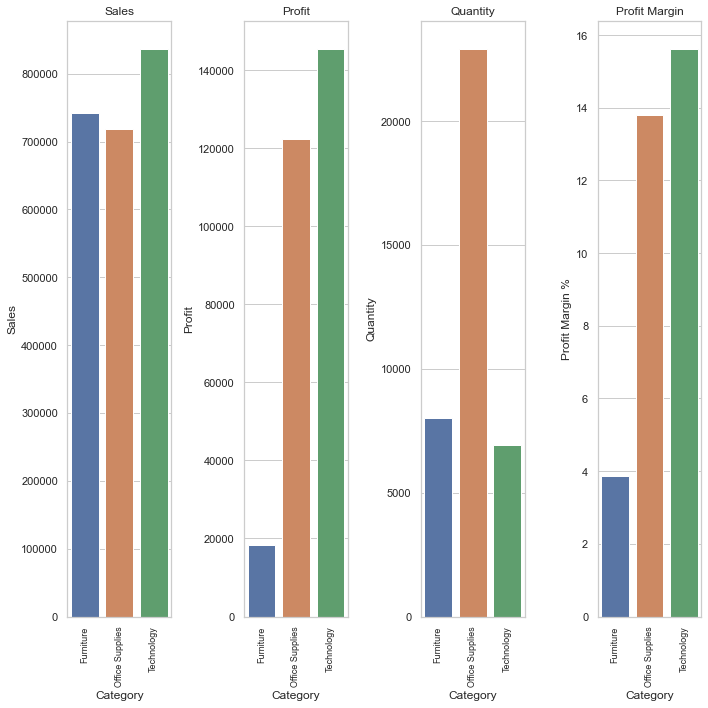

In [215]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1,4, figsize=(10,10))

#defining the x and y axis
sales = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
profit = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
quantity = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])
margin = sns.barplot(x = category_analysis.index, y = category_analysis['Profit Margin %'], ax=axis[3])

# Title for the chart
sales.set(title = 'Sales')
profit.set(title = 'Profit')
quantity.set(title = 'Quantity')
margin.set(title = 'Profit Margin')

#setting up the x axis lables
plt.setp(sales.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(profit.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(quantity.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(margin.get_xticklabels(), rotation = 'vertical', size = 9)

#spacing for the chart
figure.tight_layout()

#### From the data we come up with below summary
1) Technology category has the best sales, profit and profit margin despite it has the lowest quantity sold. The might attribute to the relatively high unit price for tech products

2) For furniture, although it has the lowest sales, it is also comparable with other category, but the profit generated is significantly lower than that of the other two category, this might be attributed to the significantly lower profit margin of the products.

3) Office supplies has significantly higher quantity sold as compared to the other 2 category, however the profit is only second to tech products, this may be attribute to the relatively low unit price for office supplies

### 2. What is the best and worst selling Sub-Category

We will be using the Sales, Profit, Quantity and Profit Margin for analysis

In [216]:
subcategory_analysis = pd.DataFrame(df.groupby(['Sub-Category']).agg({"Sales":"sum","Profit":"sum","Quantity":"sum","Profit Margin %":"median"}))
subcategory_analysis

,Sales,Profit,Quantity,Profit Margin %
Sub-Category,,,,
Accessories,167380.3180,41936.6357,2976,21.250000
Appliances,107532.1610,18138.0054,1729,26.000000
Art,27118.7920,6527.7870,3000,27.000000
Binders,203412.7330,30221.7633,5974,32.500000
Bookcases,114879.9963,-3472.5560,868,1.176471
Chairs,328449.1030,26590.1663,2356,6.250000
Copiers,149528.0300,55617.8249,234,33.750000
Envelopes,16476.4020,6964.1767,906,46.000000
Fasteners,3024.2800,949.5182,914,33.750000


In [217]:
subcategory_analysis = pd.DataFrame(subcategory_analysis.sort_values('Profit', ascending = False))
subcategory_analysis

,Sales,Profit,Quantity,Profit Margin %
Sub-Category,,,,
Copiers,149528.0300,55617.8249,234,33.750000
Phones,330007.0540,44515.7306,3289,11.250000
Accessories,167380.3180,41936.6357,2976,21.250000
Paper,78479.2060,34053.5693,5178,46.000000
Binders,203412.7330,30221.7633,5974,32.500000
Chairs,328449.1030,26590.1663,2356,6.250000
Storage,223843.6080,21278.8264,3158,8.750000
Appliances,107532.1610,18138.0054,1729,26.000000
Furnishings,91705.1640,13059.1436,3563,27.500000


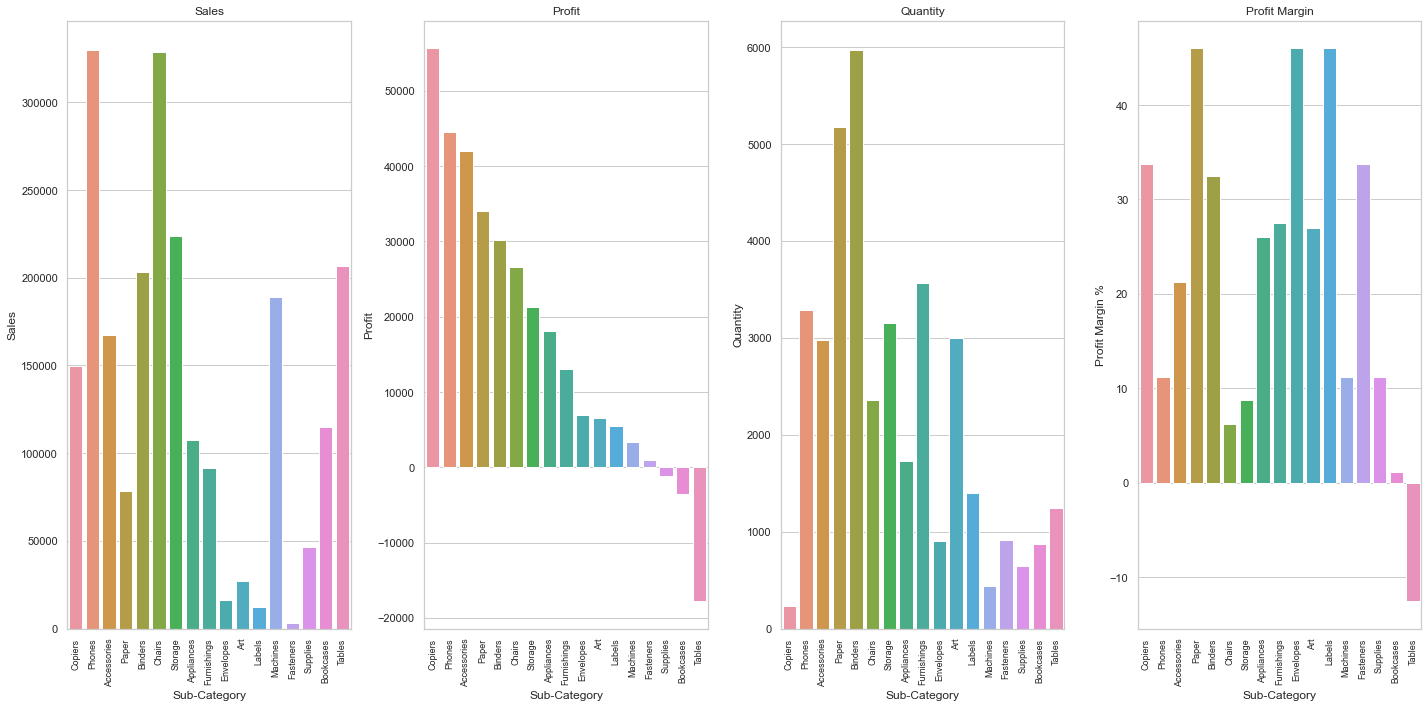

In [218]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1,4, figsize=(20,10))

#defining the x and y axis
subsales = sns.barplot(x = subcategory_analysis.index, y = subcategory_analysis.Sales, ax=axis[0])
subprofit = sns.barplot(x = subcategory_analysis.index, y = subcategory_analysis.Profit, ax=axis[1])
subquantity = sns.barplot(x = subcategory_analysis.index, y = subcategory_analysis.Quantity, ax=axis[2])
submargin = sns.barplot(x = subcategory_analysis.index, y = subcategory_analysis['Profit Margin %'], ax=axis[3])

# Title for the chart
subsales.set(title = 'Sales')
subprofit.set(title = 'Profit')
subquantity.set(title = 'Quantity')
submargin.set(title = 'Profit Margin')

#setting up the x axis lables
plt.setp(subsales.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(subprofit.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(subquantity.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(submargin.get_xticklabels(), rotation = 'vertical', size = 9)

#spacing for the chart
figure.tight_layout()

Observation from the Bar chart

- The top 3 category in sales are Phones, Charis and Storage respectively
- The top 3 category in profits are Copiers, Phones and Accessories
- The top 3 category in profit margins are Paper, Envelopes and Labels

### What Region or City has the highest and lowest sales revenue

In [274]:
# Group sales by region
region_analysis = pd.DataFrame(df.groupby(['Region'])['Sales'].sum().reset_index())
region_analysis

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


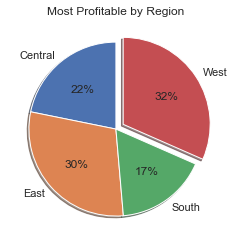

In [275]:
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Sales, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()

In [281]:
city_sales = pd.DataFrame(df.groupby(['City'])['Sales'].sum().reset_index().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

,City,Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


In [282]:
bottom10 = city_sales[-10:]
bottom10

,City,Sales
305,Missouri City,6.370
222,Keller,6.000
249,Layton,4.960
463,Springdale,4.300
441,San Luis Obispo,3.620
354,Ormond Beach,2.808
370,Pensacola,2.214
221,Jupiter,2.064
140,Elyria,1.824
1,Abilene,1.392


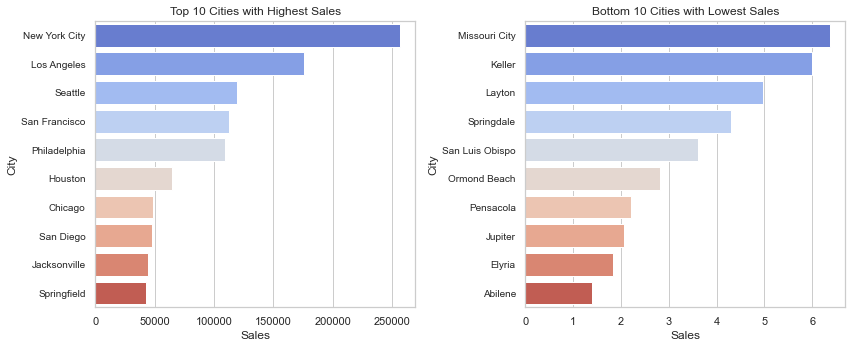

In [292]:
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.City, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10c.set(title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)


bottom10c = sns.barplot(data = bottom10, y = bottom10.City, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.set(title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)


figure.tight_layout()

plt.show()

In [297]:
top_per = city_sales['Sales'][:10].sum()/df['Sales'].sum()*100
round(top_per)

44

Observation
- The top 10 cities comprises 44% of the overall sales
- The top 10 cities in sales mostly contains the major cities in USA
- Any change in sales in the top 10 cities might pose significant impact on the overall profitability of the company

### Which segment is the most profitable


In [300]:
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


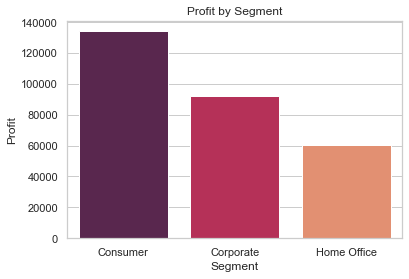

In [305]:
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Profit by Segment")
plt.show()

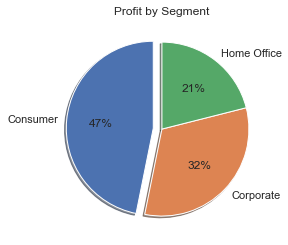

In [311]:
explode1 = [0.1, 0, 0] 
plt.pie(segment_analysis.Profit, labels = segment_analysis.index, startangle = 90,explode = explode1,autopct = "%1.0f%%", shadow = True)
plt.title("Profit by Segment")

plt.show()

Obeservation:
- We can see that the comsumer segment comprises major business for the company

### What is the most used shipping method

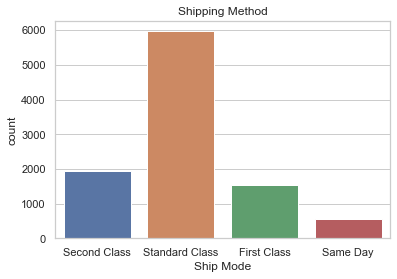

In [313]:
sns.set_theme(style="whitegrid")
sns.countplot(superstore['Ship Mode'])
plt.title("Shipping Method")
plt.show()

The shipping method that is used mostly is the Standard Class

## Recommendation

1) Majority of the profit came from tech product and office supplies, while the quantity sold is significantly less for tech product. We should focus more on boosting the quantity sold in tech product.<br>

2) We can see that majority of the lost came from book cases and table, we can consider dropping these 2 category of goods from the store, alternatively we can consider re-source these product from a different suppliers<br>

3)We can see that our profit mostly came from the consumer and corporate segment, with the recent trend of home office, we should consider allocating more resources into promoting business towards the home office segment<br>

4)The Top 10 cities in terms of sales are mostly the major urban centres in the US, however we see some cities such as Boston, Texas and Washington D.C are mssing from the top 10, we could consider planning advertising campaign in these cities and increase our presence there. Since there are alot of potential sales in these area as well.